**Level-3 Task-1**

Task: **Restaurant Reviews**
- Analyze the text reviews to identify the most common positive and negative keywords.
- Calculate the average length of reviews and explore if there is a relationship between review length and rating.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading the dataset

df = pd.read_csv('/content/drive/MyDrive/Dataset .csv')

In [ ]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

# Explore dataset



In [ ]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
# checking total number of rows and column
df.shape

(9551, 21)

In [ ]:
# check the column name, datatype and the null values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Analyze the text reviews to identify the most common positive and negative keywords.




In [ ]:
# rating count of different rating text

reviews_data = df['Rating text'].value_counts()
reviews_data

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

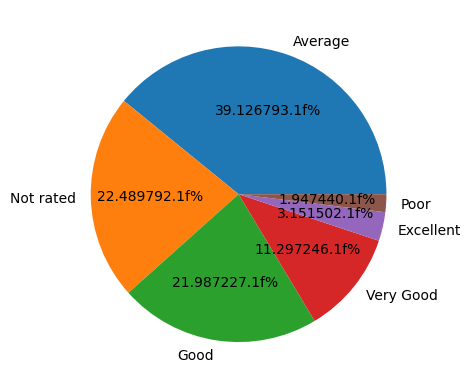

In [ ]:
plt.pie(reviews_data.values, labels=reviews_data.index, autopct = "%f.1f%%", radius = 1)
plt.show()

- Most common positive keyword count: **301**(i.e, for **Excellent**)

- Most common negative keyword count: **186**(i.e, for **Poor**)

# Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [ ]:
# Calculating average length of reviews

reviews = df['Rating text']
total_reviews = len(reviews)
total_reviews_length = 0

for review in reviews:
  total_reviews_length += len(review.split())

avg_review_length = total_reviews_length / total_reviews
print('Average review length:', round(avg_review_length, 2))

Average review length: 1.34


In [ ]:
# Relationship between rating and review length

review_len_vs_rating ={}

for rating in df['Aggregate rating'].unique():
  filtered_reviews = df.loc[df['Aggregate rating'] == rating]['Rating text']
  total_length = 0
  total_reviews = len(filtered_reviews)

  for review in filtered_reviews:
    total_length += len(review.split())

    average_length = total_length / total_reviews
  review_len_vs_rating[rating] = average_length

print('Rating vs Average review length')
print(review_len_vs_rating)

Rating vs Average review length
{4.8: 1.0, 4.5: 1.0, 4.4: 2.0, 4.9: 1.0, 4.0: 2.0, 4.2: 2.0, 4.3: 2.0, 3.6: 1.0, 4.7: 1.0, 3.0: 1.0, 3.8: 1.0, 3.7: 1.0, 3.2: 1.0, 3.1: 1.0, 0.0: 2.0, 4.1: 2.0, 3.3: 1.0, 4.6: 1.0, 3.9: 1.0, 3.4: 1.0, 3.5: 1.0, 2.2: 1.0, 2.9: 1.0, 2.4: 1.0, 2.6: 1.0, 2.8: 1.0, 2.1: 1.0, 2.7: 1.0, 2.5: 1.0, 1.8: 1.0, 2.0: 1.0, 2.3: 1.0, 1.9: 1.0}


In [ ]:
review_len_vs_rating_df = pd.DataFrame.from_dict(review_len_vs_rating, orient = 'index', columns = ['Average review length'])
review_len_vs_rating_df

Average review length
4.8                    1.0
4.5                    1.0
4.4                    2.0
4.9                    1.0
4.0                    2.0
4.2                    2.0
4.3                    2.0
3.6                    1.0
4.7                    1.0
3.0                    1.0
3.8                    1.0
3.7                    1.0
3.2                    1.0
3.1                    1.0
0.0                    2.0
4.1                    2.0
3.3                    1.0
4.6                    1.0
3.9                    1.0
3.4                    1.0
3.5                    1.0
2.2                    1.0
2.9                    1.0
2.4                    1.0
2.6                    1.0
2.8                    1.0
2.1                    1.0
2.7                    1.0
2.5                    1.0
1.8                    1.0
2.0                    1.0
2.3                    1.0
1.9                    1.0

In [ ]:
plt. figure(figsize=(12,4))
review_len_vs_rating_df = pd.DataFrame.from_dict(review_len_vs_rating, orient='index', columns=['avg_review_len'])
review_len_vs_rating_df['rating'] = review_len_vs_rating_df.index
sns.barplot(x='rating', y='avg_review_len', data=review_len_vs_rating_df)
plt.title('Rating vs Average review length')
plt.xlabel('Rating')
plt.ylabel('Average review length')
plt.show()

**Level-3 Task-2**

Task: **Votes Analysis**

- Identify the restaurants with the highest and lowest number of votes.
- Analyze if there is a correlation between the number of votes and the rating of a restaurant.

# Identify the restaurants with the highest and lowest number of votes.

In [ ]:
Highest_voted_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=False)
Highest_voted_restaurant = Highest_voted_restaurant.idxmax()
print('Highest Voted Restaurant is:', Highest_voted_restaurant)

Highest Voted Restaurant is: Barbeque Nation


In [ ]:
lowest_rated_restaurant = df.groupby('Restaurant Name')['Votes'].sum().sort_values(ascending=True)
lowest_rated_restaurant = lowest_rated_restaurant.idxmin()
print('Lowest Voted Restaurant is:', lowest_rated_restaurant)

Lowest Voted Restaurant is: Laxmi Food Corner


# Analyze if there is a correlation between the number of votes and the rating of a restaurant.

In [ ]:
correlation = np.corrcoef(df['Votes'], df['Aggregate rating'])
correlation = round(correlation[0,1], 2)
print('Correlation between votes and rating:', correlation)

Correlation between votes and rating: 0.31


**Level-3 Task-3**

Task: **Price Range vs. Online Delivery and
Table Booking**

- Analyze if there is a relationship between the price range and the availability of online delivery and table booking.
- Determine if higher-priced restaurants are more likely to offer these services.

# Analyze if there is a relationship between the price range and the availability of online delivery and table booking.

In [ ]:
# to analyzed this we need to plot 2 chats together

x1 = df['Has Online delivery']
y = df['Average Cost for two']
x2 = df['Has Table booking']

- Plot 1 for Online Delivery with the average cost
- Plot 1 for Table Booking with the average cost

In [ ]:
plt.figure(figsize= (10,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y=y)
plt.xlabel('Online delivery')
plt.ylabel('Average Cost for two')
plt.title('Online delivery affected by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y=y)
plt.xlabel('Table booking')
plt.ylabel('Average Cost for two')
plt.title('Table booking affected by cost')
plt.tight_layout()
plt.show()

*Both the Online delivery and Table booking are negetively impacted by the cost*

# Determine if higher-priced restaurants are more likely to offer these services.

In [ ]:
print('High priced restaurants which have average cost more than 10,000 did not provide online delivery as well as Table Booking facilities')


High priced restaurants which have average cost more than 10,000 did not provide online delivery as well as Table Booking facilities


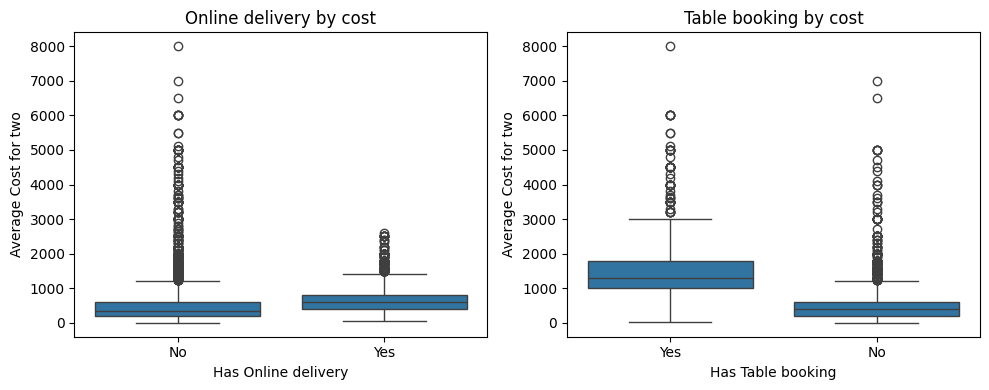

In [ ]:
# Let's check for the restaurent have average cost less than 10000:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x=x1, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Online delivery by cost')
plt.subplot(1,2,2)
sns.boxplot(x=x2, y='Average Cost for two', data=df.loc[df['Average Cost for two']<10000])
plt.title('Table booking by cost')
plt.tight_layout()
plt.show()

- *The Online delivery facility is present for only those restaurant, where the average cost is less than 1000.*

- *The Table booking facility is available in restaurent with an average cost ranging from 1000 to 2000.*